Lab Assignment 2

~ Rhythm Shah

~ 1233960561

~ 02/05/2025

## Code Cell 1 (5%) :  Library and data import (use the first 10000 rows). Show the summary of the input data.

Importing all the required Libraries & then reading the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv('restaurant_reviews_az.csv', nrows=10000)
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",1/27/2020 22:59,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2/29/2020 19:43,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,3/14/2020 21:47,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",1/17/2020 20:32,1
...,...,...,...,...,...,...,...,...,...,...
9995,_W0OFIxgwbwRhpEPTKHqHg,e-x6Jaeqts5UU5631UpgXQ,dhj16roKb6Z-TyJ0w6iqjQ,3,2,0,1,Found this tepanyaki restaurant a few years ag...,10/12/2021 2:08,0
9996,Fppk7c4xmBJsUGRCB4ho7A,ZNeup5N06v8liYL3BolGsA,#NAME?,5,0,0,0,This was our first time in Tucson. We decided ...,1/14/2022 23:09,1
9997,fI3v-kTUtE7alT2RtOGzvA,P98oZ7bYaerBmDqdMHU0mQ,dhj16roKb6Z-TyJ0w6iqjQ,1,1,1,0,We had a birthday dinner reservation at 8:00 w...,2/21/2021 18:40,0
9998,CjwMkf9nFa7ZNmbwMezcaQ,Js1FsZ6oP_9tO5tbJN-d2g,vI-2mPYOgfix5LcaqDOy_g,4,8,4,7,Took my parents to dinner here for my Dads bir...,5/19/2021 3:06,1


This dataset has 10000 columns and 10 features.

## Code Cell 2 (10%) - Conduct necessary data processing & then apply lexicon-based approach with VaderSentiment to predict sentiment

In [2]:
df['text'] = df['text'].fillna('')  # Fill NaN values
df['text'] = df['text'].str.lower()  # Convert to lowercase

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']
df['vader_sentiment'] = df['text'].apply(get_sentiment)

df['vader_label'] = pd.cut(df['vader_sentiment'], bins=[-1, -0.05, 0.05, 1],labels=['negative', 'neutral', 'positive'])
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment,vader_sentiment,vader_label
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"ok, the hype about having hatch chili in your ...",1/27/2020 22:59,1,0.9860,positive
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1,0.5877,positive
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,i was lucky enough to go to the soft opening a...,2/29/2020 19:43,1,0.9732,positive
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,i've gone to claim jumpers all over the us and...,3/14/2020 21:47,1,0.9327,positive
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"if you haven't been to maynard's kitchen, it'...",1/17/2020 20:32,1,0.9817,positive


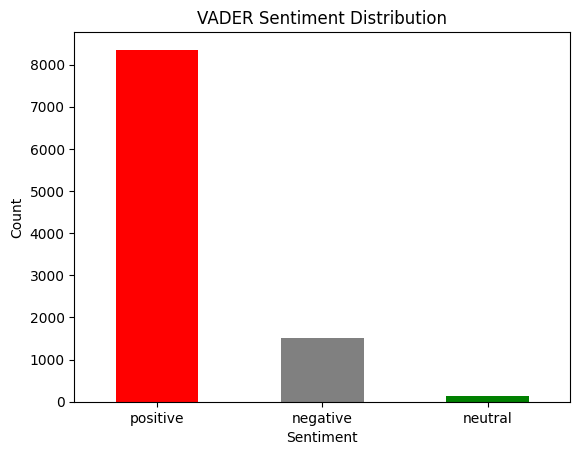

In [3]:
import matplotlib.pyplot as plt

df['vader_label'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.show()

Imputed missing values and converted all the text to lowercase. Then perfomed VaderSentiment to predict the sentiments and store in vader_label.

## Code Cell 3 (5%) - Set up review text & sentiment label. Prepare the training & test sets using data split. Quantify with bag of words vectorization using Count Vectorizer

In [4]:
X = df['text']
y = df['vader_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
vectorizer.get_feature_names_out()  # Unique words in vocabulary

array(['00', '10', '100', '11', '12', '15', '19', '20', '25', '30', '40',
       '45', '50', 'able', 'about', 'above', 'absolutely', 'across',
       'actually', 'add', 'added', 'after', 'again', 'ago', 'ahead', 'al',
       'all', 'almost', 'along', 'already', 'also', 'although', 'always',
       'am', 'amazing', 'ambiance', 'amount', 'an', 'and', 'angel',
       'another', 'any', 'anyone', 'anything', 'anywhere', 'app',
       'appetizer', 'appetizers', 'appreciate', 'are', 'area', 'arizona',
       'around', 'arrived', 'as', 'asada', 'ask', 'asked', 'asking', 'at',
       'ate', 'atmosphere', 'attention', 'attentive', 'attitude',
       'authentic', 'available', 'average', 'avocado', 'away', 'awesome',
       'awful', 'back', 'bacon', 'bad', 'baked', 'bar', 'barely',
       'barrio', 'bartender', 'based', 'basil', 'bbq', 'be', 'beans',
       'beautiful', 'because', 'beef', 'been', 'beer', 'beers', 'before',
       'behind', 'being', 'believe', 'best', 'better', 'between',
       'b

* Performed Train & Test Data Split.
* Implemented CountVectorizer and Printed the Tokens stored

## Code Cell 4 (10%) - Describe the processed data

In [5]:
print(f"Number of tokens: {X_train_vectorized.sum()}")
print(f"Number of unique tokens: {len(vectorizer.get_feature_names_out())}")
print(f"Number of unique customers: {df['user_id'].nunique()}")

print(f"Average tokens per review: {X_train_vectorized.sum() / X_train_vectorized.shape[0]:.2f}")
print(f"Sparsity of the matrix: {100.0 * (1.0 - X_train_vectorized.nnz / (X_train_vectorized.shape[0] * X_train_vectorized.shape[1])):.2f}%")


Number of tokens: 556995
Number of unique tokens: 1000
Number of unique customers: 6830
Average tokens per review: 69.62
Sparsity of the matrix: 95.31%


## Code Cells 5 (10%) - Apply naïve Bayes classification to Train data.

In [6]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

y_pred_nb = nb_classifier.predict(X_test_vectorized)

# Performance Report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.53      0.74      0.62       293
     neutral       0.09      0.03      0.04        35
    positive       0.94      0.89      0.92      1672

    accuracy                           0.86      2000
   macro avg       0.52      0.55      0.53      2000
weighted avg       0.87      0.86      0.86      2000

Accuracy: 0.8560


Applied Naïve Bayes Classification on Train data and got an accuracy of 85%.

## Code Cell 6 (10%) - Apply support vector machines (SVM) classification to Train data.

In [7]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

# Predict on test set
y_pred_svm = svm_classifier.predict(X_test_vectorized)

# Performance Report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")


SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.60      0.68      0.64       293
     neutral       0.23      0.14      0.18        35
    positive       0.94      0.93      0.93      1672

    accuracy                           0.88      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.88      0.88      0.88      2000

Accuracy: 0.8760


Applied Support Vector Machines Classification on Train data and got an accuracy of 87%.

## Code Cell 7 (10%) - Reload the data & perform TF-IDF quantification on the processed data.

In [8]:
df = pd.read_csv('restaurant_reviews_az.csv', nrows=10000)

df['text'] = df['text'].fillna('')  # Fill NaN values
df['text'] = df['text'].str.lower()  # Convert to lowercase

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

df['vader_sentiment'] = df['text'].apply(get_sentiment)

df['vader_label'] = pd.cut(df['vader_sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['negative', 'neutral', 'positive'])

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['vader_label'], test_size=0.2, random_state=42)

* Got Polarity scores using the SenteimentIntensityAnalyser and then classified the text into negative, positive or neutral sentiments.
* Implemented tfidf vectorizer to store the count of words. Then performed train test split x being the tfidf split and y being the sentiment labels

## Code Cell 8 (10%) - Apply logistic regression to Train data

In [9]:
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)

y_pred_lr = lr_classifier.predict(X_test_tfidf)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.60      0.65       293
     neutral       0.00      0.00      0.00        35
    positive       0.92      0.97      0.94      1672

    accuracy                           0.90      2000
   macro avg       0.55      0.52      0.53      2000
weighted avg       0.87      0.90      0.88      2000

Accuracy: 0.8955


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Applied Logistic Regression on the Train Data and got an accuracy of 89%

## Text Cell 9 (5%) - Compare and conclude your observations on the performance of lexicon-based sentiment analysis approach and different machine learning models.

### Comparison of Sentiment Analysis Approaches

1. **Lexicon-based Approach (VADER Sentiment Analysis)**  
   - VADER is a rule-based sentiment analysis tool that assigns polarity scores to text.
   - It works well for general sentiment detection but may struggle with nuanced expressions and domain-specific sentiment.  

2. **Naïve Bayes Classification**  
   - Model Accuracy = **85.60%**.  
   - Naïve Bayes is computationally efficient and performs well on text data. However, it assumes feature independence, which may not always hold for natural language processing tasks.

3. **Support Vector Machine (SVM) Classification**  
   - Model Accuracy = **87.60%**.  
   - SVM provides a powerful decision boundary for text classification. However, training can be slower, especially with larger datasets.

4. **Logistic Regression (TF-IDF)**  
   - Model Accuracy = **89.55%**.  
   - Logistic Regression is interpretable and works well with TF-IDF transformed data. It can generalize well with a sufficient amount of training data.

### **Observations and Conclusion**
- **Lexicon-based approaches (VADER)** are useful for quick analysis but may not capture contextual meanings.
- **Machine Learning approaches (Naïve Bayes, SVM, and Logistic Regression)** generally provide better accuracy.
- **TF-IDF performed better than Naïve Bayes** since it gives more importance to significant words.
- **Logistic Regression and SVM performed the best**, showing the effectiveness of machine learning models over lexicon-based sentiment analysis.

**Logistic Regression (TF-IDF)** appears to be the best model based on accuracy and generalization ability.

## Code Cell 10 (10%) - Apply the trained logistic regression model to predict sentiment on the three customer reviews listed in Input 2.

In [10]:
new_reviews = [
    "The service is good, but location is hard to find. Sanitation is not very good with old facilities. Food served tasted extremely fishy, making us difficult to even finish it.",
    "The restaurant is definitely one of my favorites and of my family as well. I was especially impressed with my visit a few days ago. The place is clean, and you just need to wait for fewer than 10 minutes to get food served. And of course, the food is absolutely delicious!",
    "I appreciated the friendly staff. The food was good, not amazing. The service was not prompt but almost acceptable. A reliable spot for a regular meal, but nothing extraordinary."
]

# Transform new reviews using TF-IDF vectorizer
new_reviews_tfidf = tfidf_vectorizer.transform(new_reviews)

# Predict sentiments for new reviews
new_predictions = lr_classifier.predict(new_reviews_tfidf)
new_probabilities = lr_classifier.predict_proba(new_reviews_tfidf)

# Print results
for i, (review, prediction, probabilities) in enumerate(zip(new_reviews, new_predictions, new_probabilities)):
    print(f"Review {i+1}:")
    print(f"Text: {review}")
    print(f"Predicted sentiment: {prediction}")
    print(f"Probabilities: Negative: {probabilities[0]:.4f}, Neutral: {probabilities[1]:.4f}, Positive: {probabilities[2]:.4f}")
    print()


Review 1:
Text: The service is good, but location is hard to find. Sanitation is not very good with old facilities. Food served tasted extremely fishy, making us difficult to even finish it.
Predicted sentiment: positive
Probabilities: Negative: 0.4494, Neutral: 0.0301, Positive: 0.5204

Review 2:
Text: The restaurant is definitely one of my favorites and of my family as well. I was especially impressed with my visit a few days ago. The place is clean, and you just need to wait for fewer than 10 minutes to get food served. And of course, the food is absolutely delicious!
Predicted sentiment: positive
Probabilities: Negative: 0.0180, Neutral: 0.0030, Positive: 0.9789

Review 3:
Text: I appreciated the friendly staff. The food was good, not amazing. The service was not prompt but almost acceptable. A reliable spot for a regular meal, but nothing extraordinary.
Predicted sentiment: positive
Probabilities: Negative: 0.0555, Neutral: 0.0082, Positive: 0.9364



Applied the trained Logistic Regression model on 3 cutomer Reviews and predicted the probabilities of the sentiments asscociated.

## Text Cell 11 (5%) - Classify these reviews in Input 2 into positive, neutral, or negative sentiments. Include your reasoning of classification. Comment on the classification results for this new task.

* Review 1 has mixed sentiments as it has both positive and negative statements. This can be seen in the probabilities as there is a 52% probability for positive and 45% probability for negative. The model predicts a positive sentiment for the review becuase of the higher probability.
* Review 2 and Review 3 have strong probabilities for a positive sentiment and that is why the model also predicts a positive sentiment for both these reviews.

## Text Cell 12 (5%) - Acknowledge if you have used any GenAI tools in this assignment and anyone you have worked together with on this assignment.

I acknowledge that I used AI tools, including ChatGPT, to assist in generating code and structuring the observations for this assignment. These tools were used for educational purposes to enhance my understanding of text processing techniques and NLP concepts. I also confirm that I completed the analysis and interpretations independently.

In [1]:
!jupyter nbconvert "/Users/rhy/Library/CloudStorage/OneDrive-ArizonaStateUniversity/ASU/SEM 2/CIS 509 Analytics Unstructured Data/Lab Assignment 2/LA2_Shah_Rhythm.ipynb" --to html

[NbConvertApp] Converting notebook /Users/rhy/Library/CloudStorage/OneDrive-ArizonaStateUniversity/ASU/SEM 2/CIS 509 Analytics Unstructured Data/Lab Assignment 2/LA2_Shah_Rhythm.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 367582 bytes to /Users/rhy/Library/CloudStorage/OneDrive-ArizonaStateUniversity/ASU/SEM 2/CIS 509 Analytics Unstructured Data/Lab Assignment 2/LA2_Shah_Rhythm.html
